In [11]:
from roboflow import Roboflow
import json

rf = Roboflow(api_key="UoWD7ey021Y4ZebxKrBu")
# project = rf.workspace().project("potato-disease-cw1hc")
project = rf.workspace().project("leafdata12-11")
model = project.version(1).model


my_image = './assets/y-virus-leaf-potato.jpeg'

predictions = model.predict(my_image, confidence=50)

print(json.dumps(predictions.json(), indent=4))

loading Roboflow workspace...
loading Roboflow project...
{
    "predictions": [],
    "image": {
        "width": "700",
        "height": "483"
    }
}


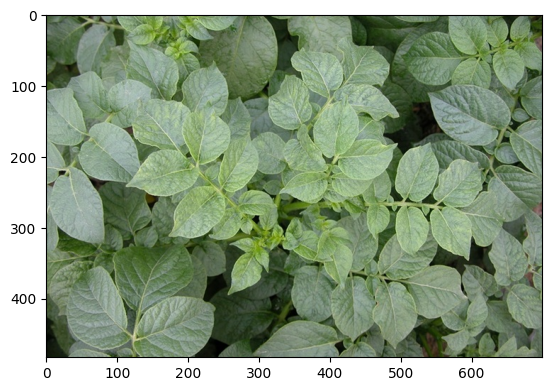

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 이미지 파일을 표시합니다.
image = plt.imread(my_image)
plt.imshow(image)

# 예측 정보를 가져옵니다.
predictions_json = predictions.json()['predictions']

# 예측 영역을 이미지에 그립니다.
for prediction in predictions:
    x_center = prediction['x'] 
    y_center = prediction['y'] 
    width = prediction['width']
    height = prediction['height']
    class_name = prediction['class']
    confidence = prediction['confidence']

    # 바운딩 박스 그리기
    plt.gca().add_patch(patches.Rectangle((x_center - width / 2, y_center - height / 2), width, height, linewidth=2, edgecolor='r', facecolor='none'))

    # 클래스와 신뢰도 표시
    plt.text(x_center - width / 2, y_center - height / 2 - 10, f"Class: {class_name} // Confidence: {confidence:.2f}", color='r')
plt.show()
